# 实验练习10 参考答案

In [1]:
import pymysql
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 任务1
db = pymysql.connect(host = "cdb-r2g8flnu.bj.tencentcdb.com", port = 10209, user = "dase2020", password = "dase2020", database = "dase_intro_2020")
cursor = db.cursor()

sql = "SELECT * FROM SH_Grade;"
cursor.execute(sql)
result = cursor.fetchall()

with open('SH_Grade.csv','w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['id','StuId','Class','Sex','CHI611','MATH611','ENG611','CHI612','MATH612','ENG612','CHI621','MATH621','ENG621','CHI622','MATH622','ENG622','CHI711','MATH711','ENG711','CHI712','MATH712','ENG712','CHI721','MATH721','ENG721','CHI722','MATH722','ENG722','CHI811','MATH811','ENG811','PHY811','CHI812','MATH812','ENG812','PHY812','CHI821','MATH821','ENG821','PHY821','CHI822','MATH822','ENG822','PHY822','CHI911','MATH911','ENG911','PHY911','CHE911','CHI912','MATH912','ENG912','PHY912','CHE912','CHI921','MATH921','ENG921','PHY921','CHE921'])
    for row in result:
        row = list(row)
        row.insert(2,row[1][0])
        writer.writerow(row)

In [2]:
# 任务2
data = pd.read_csv('SH_Grade.csv')
print('处理前数据条目：',data.shape[0])

data = data.drop_duplicates(subset=['StuId'])
print('处理后数据条目：',data.shape[0])

处理前数据条目： 252
处理后数据条目： 243


In [3]:
# 任务3
print('处理前数据条目：',data.shape[0])

data = data.dropna(thresh=47)
print('处理后数据条目：',data.shape[0])

处理前数据条目： 243
处理后数据条目： 189


In [4]:
# 任务4
data['Sex'] = data['Sex'].fillna(method='ffill')
data.loc[:,'CHI611':] = data.loc[:,'CHI611':].fillna(data.loc[:,'CHI611':].median())  # 注意切片选取，仅填充成绩数据的相关列

In [5]:
# 任务5 查看成绩每列的最大值
data.loc[:,'CHI611':].describe().loc['max']

CHI611      88.0
MATH611    100.0
ENG611      99.0
CHI612      89.0
MATH612    100.0
ENG612     100.0
CHI621      93.0
MATH621    100.0
ENG621     100.0
CHI622      90.0
MATH622    100.0
ENG622     100.0
CHI711      88.0
MATH711    100.0
ENG711      99.0
CHI712      94.0
MATH712    100.0
ENG712      99.0
CHI721      89.0
MATH721     98.0
ENG721      99.0
CHI722      88.0
MATH722    100.0
ENG722      99.0
CHI811      93.0
MATH811    100.0
ENG811     100.0
PHY811     100.0
CHI812      96.0
MATH812    100.0
ENG812     100.0
PHY812      98.0
CHI821      89.0
MATH821     96.0
ENG821      98.0
PHY821     100.0
CHI822     108.0
MATH822    120.0
ENG822     119.0
PHY822     100.0
CHI911     140.0
MATH911    150.0
ENG911     145.0
PHY911      90.0
CHE911      59.0
CHI912     139.0
MATH912    150.0
ENG912     147.5
PHY912      98.0
CHE912      98.0
CHI921     134.0
MATH921    150.0
ENG921     147.5
PHY921      90.0
CHE921      58.0
Name: max, dtype: float64

In [6]:
# 任务5 转换至百分制
data[['CHI822','MATH822','ENG822']] = data[['CHI822','MATH822','ENG822']] / 120 * 100
data[['CHI911','MATH911','ENG911','CHI912','MATH912','ENG912','CHI921','MATH921','ENG921']] = data[['CHI911','MATH911','ENG911','CHI912','MATH912','ENG912','CHI921','MATH921','ENG921']] / 150 * 100
data[['PHY911','PHY921']] = data[['PHY911','PHY921']] / 0.9
data[['CHE911','CHE921']] = data[['CHE911','CHE921']] / 0.6

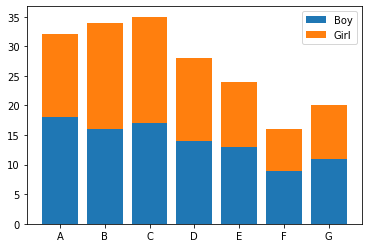

In [7]:
# 任务6
boy_by_class = data.loc[data['Sex'] == 'M'].groupby('Class')['StuId'].count()
girl_by_class = data.loc[data['Sex'] == 'F'].groupby('Class')['StuId'].count()

plt.bar(boy_by_class.index,boy_by_class.values,label='Boy')
plt.bar(girl_by_class.index,girl_by_class.values,bottom=boy_by_class.values,label='Girl')
plt.legend()
plt.show()

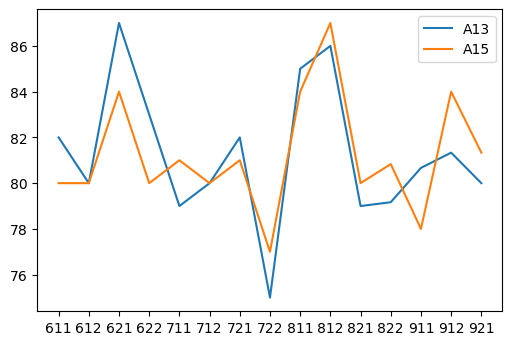

In [8]:
# 任务7
a13_chi_grade = data.loc[data['StuId'] == 'A13'][['CHI611','CHI612','CHI621','CHI622','CHI711','CHI712','CHI721','CHI722','CHI811','CHI812','CHI821','CHI822','CHI911','CHI912','CHI921']]
a15_chi_grade = data.loc[data['StuId'] == 'A15'][['CHI611','CHI612','CHI621','CHI622','CHI711','CHI712','CHI721','CHI722','CHI811','CHI812','CHI821','CHI822','CHI911','CHI912','CHI921']]
x = [t[3:] for t in a13_chi_grade.columns]
y1 = a13_chi_grade.values[0]
y2 = a15_chi_grade.values[0]

plt.figure(dpi=100)
plt.plot(x,y1,label='A13')
plt.plot(x,y2,label='A15')
plt.legend()
plt.show()

In [9]:
# 任务8
data_8 = data.query('ENG721 < 60 or CHI721 < 60')
data_8 = data_8[['StuId','Class','ENG721','CHI721']]
print(data_8)

    StuId Class  ENG721  CHI721
57    B17     B    30.0    42.0
121   D02     D    51.0    75.0
132   D13     D    54.0    73.0
147   D29     D    54.0    76.0
164   E14     E    47.0    64.0
172   E22     E    46.0    65.0
173   E23     E    54.0    68.0
176   E26     E    26.0    53.0
178   E28     E    36.0    48.0
179   E29     E    53.0    70.0
180   E30     E    34.0    48.0
181   E31     E    56.0    76.0
191   F09     F    36.0    67.0
192   F10     F    37.0    61.0
193   F11     F    34.0    50.0
200   F18     F    53.0    58.0
202   F20     F    82.0    56.0
204   F22     F    79.0    56.0
209   F27     F    53.0    72.0
220   G08     G    53.0    63.0
225   G13     G    41.0    67.0
226   G14     G    52.0    48.0
237   G25     G    44.0    77.0
238   G26     G    76.0    35.0
241   G29     G    60.0    59.0
242   G30     G    82.0    57.0


In [10]:
# 任务9
data_9a = data.loc[(data['Class'] == 'A')]
data_9c = data.loc[(data['Class'] == 'C')]
data_9a = data_9a[['CHI622','MATH622','ENG622']]
data_9c = data_9c[['CHI622','MATH622','ENG622']]

print('Mean of Class A:\n',data_9a.mean())
print('Mean of Class C:\n',data_9c.mean())
print('Var of Class A:\n',data_9a.var())
print('Var of Class C:\n',data_9c.var())

# 语文：A班较C班成绩较高
# 数学：两班平均成绩相似，但是C班成绩方差较大（极值可能较多）
# 英语：C班比A班成绩较高

Mean of Class A:
 CHI622     81.40625
MATH622    90.75000
ENG622     89.96875
dtype: float64
Mean of Class C:
 CHI622     76.971429
MATH622    89.200000
ENG622     91.257143
dtype: float64
Var of Class A:
 CHI622     28.700605
MATH622    19.935484
ENG622     32.160282
dtype: float64
Var of Class C:
 CHI622     26.263866
MATH622    71.694118
ENG622     37.608403
dtype: float64


In [11]:
# 任务10
data_8.to_csv('task8.csv',index=0)